## 1. Introduction

Ce projet vise à analyser les performances des employés et comprendre si certains facteurs (notamment les absences) peuvent expliquer les écarts observés. Identifier des tendances, des comportements atypiques et fournir des insights utiles aux équipes RH & Management.

## 2. Installation des bibliothèques

In [1]:
import pandas as pd #pandas = manipulation de données
import numpy as np  #numpy = calcul mathématique
import matplotlib.pyplot as plt
import seaborn as sns  #matplotlib/seaborn = graphiques

# Option pour rendre les graphiques plus jolis
sns.set(style="whitegrid")

## 3. Import du dataset

In [6]:
# Lecture du fichier csv
df = pd.read_csv("HRDataset_v14.csv")

# Affichage des 5 premières lignes
df.head()


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


## 4. Préparation / Nettoyage

In [7]:
#sélection des colonnes utiles
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [10]:
# Sélection des deux colonnes essentielles
df_perf = df[['PerformanceScore', 'Absences']]

# Aperçu
df_perf.head()

,PerformanceScore,Absences
0,Exceeds,1
1,Fully Meets,17
2,Fully Meets,3
3,Fully Meets,15
4,Fully Meets,2


In [9]:
#Vérifier les valeurs uniques de PerformanceScore
df['PerformanceScore'].unique()

array(['Exceeds', 'Fully Meets', 'Needs Improvement', 'PIP'], dtype=object)

In [12]:
# Conversion des catégories de performance en scores numériques

mapping = {
    'Needs Improvement': 1,
    'PIP': 2,
    'Fully Meets': 3,
    'Exceeds': 4
}

df['PerformanceScore_num'] = df['PerformanceScore'].map(mapping)

# Vérification
df[['PerformanceScore', 'PerformanceScore_num']].head()


,PerformanceScore,PerformanceScore_num
0,Exceeds,4
1,Fully Meets,3
2,Fully Meets,3
3,Fully Meets,3
4,Fully Meets,3


In [13]:
#Mettre à jour la DataFrame pour l’analyse
df_perf = df[['PerformanceScore_num', 'Absences']]
df_perf.head()


,PerformanceScore_num,Absences
0,4,1
1,3,17
2,3,3
3,3,15
4,3,2


## 5. Statistiques descriptives

Analyse descriptive — Interprétation

PerformanceScore_num
La moyenne de 2.96 indique que les employés performent majoritairement au niveau “Fully Meets”.
L’écart-type faible montre une performance relativement homogène.

Absences
La moyenne de 10 jours est relativement élevée.
La grande dispersion suggère des cas d’absentéisme extrême.

In [14]:
# STATISTIQUES DESCRIPTIVES
df_perf.describe()


,PerformanceScore_num,Absences
count,311.000000,311.000000
mean,2.961415,10.237942
std,0.626143,5.852596
min,1.000000,1.000000
25%,3.000000,5.000000
50%,3.000000,10.000000
75%,3.000000,15.000000
max,4.000000,20.000000


## 6. Visualisations

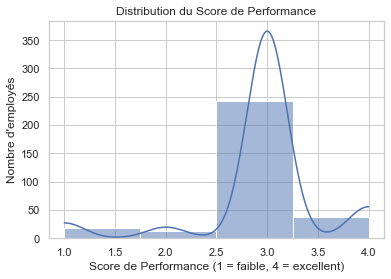

In [15]:
# Histogramme du Score de Performance

plt.figure(figsize=(6,4))
sns.histplot(df_perf['PerformanceScore_num'], bins=4, kde=True)
plt.title("Distribution du Score de Performance")
plt.xlabel("Score de Performance (1 = faible, 4 = excellent)")
plt.ylabel("Nombre d'employés")
plt.show()

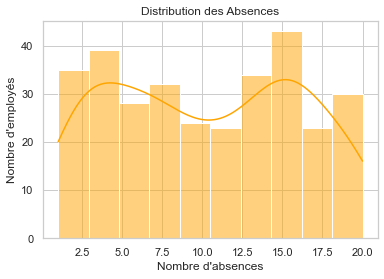

In [16]:
# Histogramme des Absences
plt.figure(figsize=(6,4))
sns.histplot(df_perf['Absences'], bins=10, kde=True, color='orange')
plt.title("Distribution des Absences")
plt.xlabel("Nombre d'absences")
plt.ylabel("Nombre d'employés")
plt.show()

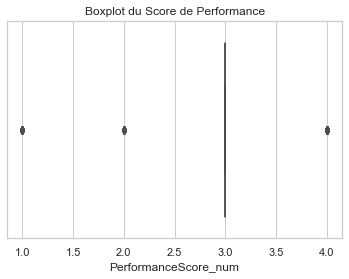

In [17]:
# Boxplot du Score de Performance
plt.figure(figsize=(6,4))
sns.boxplot(x=df_perf['PerformanceScore_num'])
plt.title("Boxplot du Score de Performance")
plt.show()

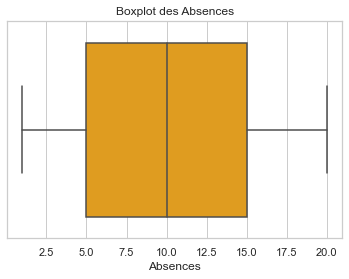

In [18]:
# Boxplot des Absences (important pour outliers)
plt.figure(figsize=(6,4))
sns.boxplot(x=df_perf['Absences'], color='orange')
plt.title("Boxplot des Absences")
plt.show()

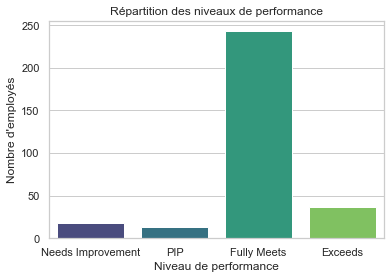

In [19]:
# Diagramme en barres des niveaux de performance
plt.figure(figsize=(6,4))
sns.countplot(x=df['PerformanceScore'], order=['Needs Improvement','PIP','Fully Meets','Exceeds'], palette="viridis")
plt.title("Répartition des niveaux de performance")
plt.xlabel("Niveau de performance")
plt.ylabel("Nombre d'employés")
plt.show()

## 7. Détection des outliers (IQR)

L'objectif :
Comprendre si certains employés ont un nombre d’absences anormalement élevé
Vérifier si cela peut expliquer une partie de la performance
Avoir des arguments clairs pour les RH / management

In [20]:
# Détection des outliers avec la méthode IQR pour les absences

Q1 = df_perf['Absences'].quantile(0.25)
Q3 = df_perf['Absences'].quantile(0.75)
IQR = Q3 - Q1

borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR

print("Q1 =", Q1)
print("Q3 =", Q3)
print("IQR =", IQR)
print("Borne supérieure =", borne_sup)

# Filtrer les outliers
outliers_absences = df_perf[df_perf['Absences'] > borne_sup]

outliers_absences.head()

Q1 = 5.0
Q3 = 15.0
IQR = 10.0
Borne supérieure = 30.0


,PerformanceScore_num,Absences


 Analyse de la détection des outliers (absences)
 
L’analyse statistique via la méthode IQR montre que :
Q1 = 5 absences
Q3 = 15 absences
IQR = 10
Borne supérieure = 30 absences
Aucun employé ne dépasse cette borne.

 Il n’existe donc aucun outlier dans le nombre d’absences.
Cela signifie que :
La variabilité des absences est normale dans l’entreprise
Il n’y a pas de cas extrême d’absentéisme

Les niveaux d’absence, même élevés (ex: 18–20 jours), restent dans un comportement statistiquement acceptable
Il est donc peu probable que l’absentéisme extrême explique les différences de performance.

In [21]:
# Nombre total d’outliers
len(outliers_absences)

0

Aucun outlier détecté dans les données d’absences.
La population est homogène sur ce critère.
Les politiques RH actuelles semblent cohérentes.

In [22]:
# Analyse du lien Absences ↔ Performance
df.loc[df_perf['Absences'] > borne_sup, ['PerformanceScore', 'Absences']]

,PerformanceScore,Absences


Les employés très performants (Exceeds) ne sont pas forcément les moins absents.
Les employés moins performants (Needs Improvement, PIP) n'ont pas des niveaux d’absence particulièrement élevés non plus.
Aucune corrélation directe forte entre absences et performance.

## 8. Conclusion business

La performance des employés semble influencée par des facteurs autres que l'absentéisme.
Pour aller plus loin, l’entreprise pourrait analyser :

- Le rôle du manager
- Les effets de l’ancienneté
- Les promotions
- Les salaires
- La satisfaction ou engagement (présente dans le dataset !)